Importar librerías

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Carga y previsualización de Datos

In [92]:
# Base de Datos originales
data = pd.read_csv('data/bank-full.csv', sep=';')
data.shape

(45211, 17)

In [93]:
# Base de datos sin categóricas
data_numerica = pd.read_csv('data/bank_full_limpio.csv')
y_map = {'no':0, 'yes': 1}
data_numerica['y'] = data_numerica['y'].map(y_map)

In [94]:
target = 'y'

In [95]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [96]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [97]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Estadisticas descriptivas

In [98]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [99]:
# Frecuencias para variables categóricas
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']:
    print(col)
    print(data[col].value_counts())

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
default
no     44396
yes      815
Name: default, dtype: int64
housing
yes    25130
no     20081
Name: housing, dtype: int64
loan
no     37967
yes     7244
Name: loan, dtype: int64
contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
y
no     39922
yes     5289
Name: y, dtype: int64


### Matriz de correlación

C:\Users\vivia\AppData\Local\Temp\ipykernel_13436\1614687137.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_numerica.corr(), cmap="Blues", annot=True)


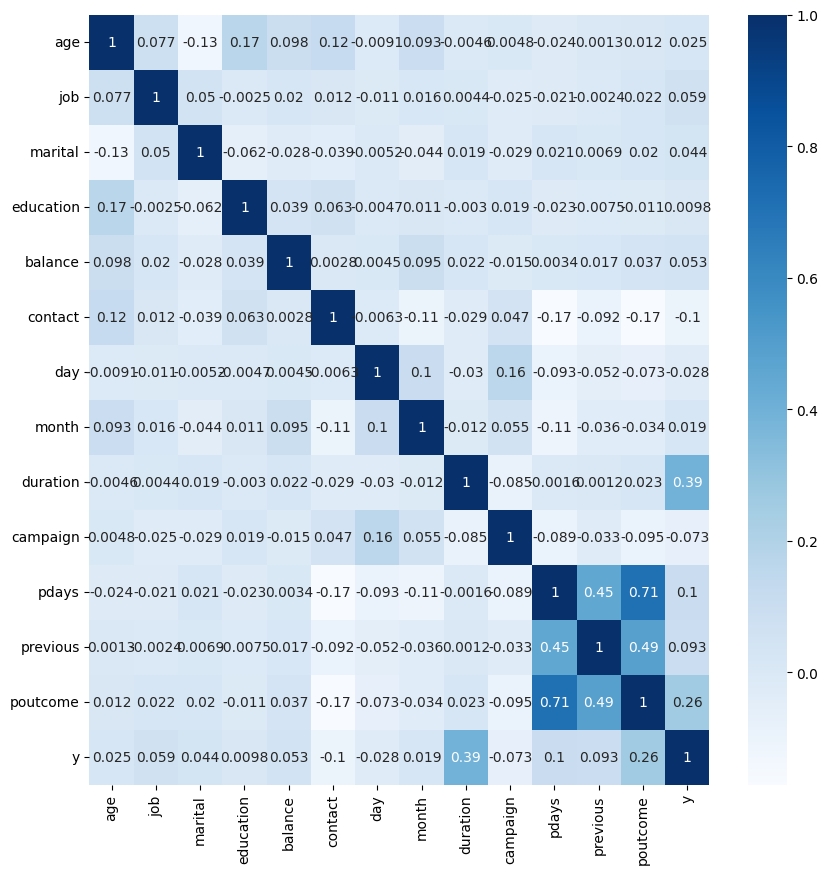

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(data_numerica.corr(), cmap="Blues", annot=True)
plt.show()

<Axes: >

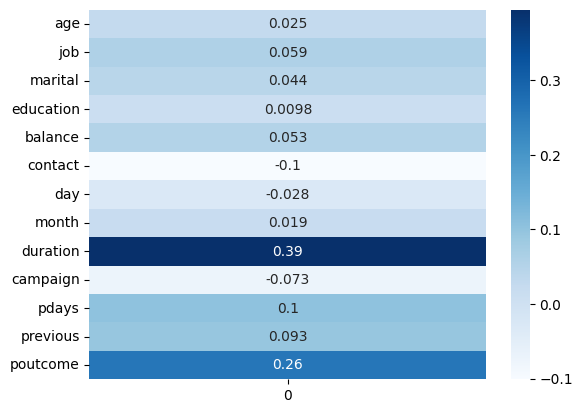

In [101]:
corrw = data_numerica.select_dtypes(exclude=['object']).drop([target], axis=1).corrwith(data_numerica[target])
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

### Gráficos exploratorios

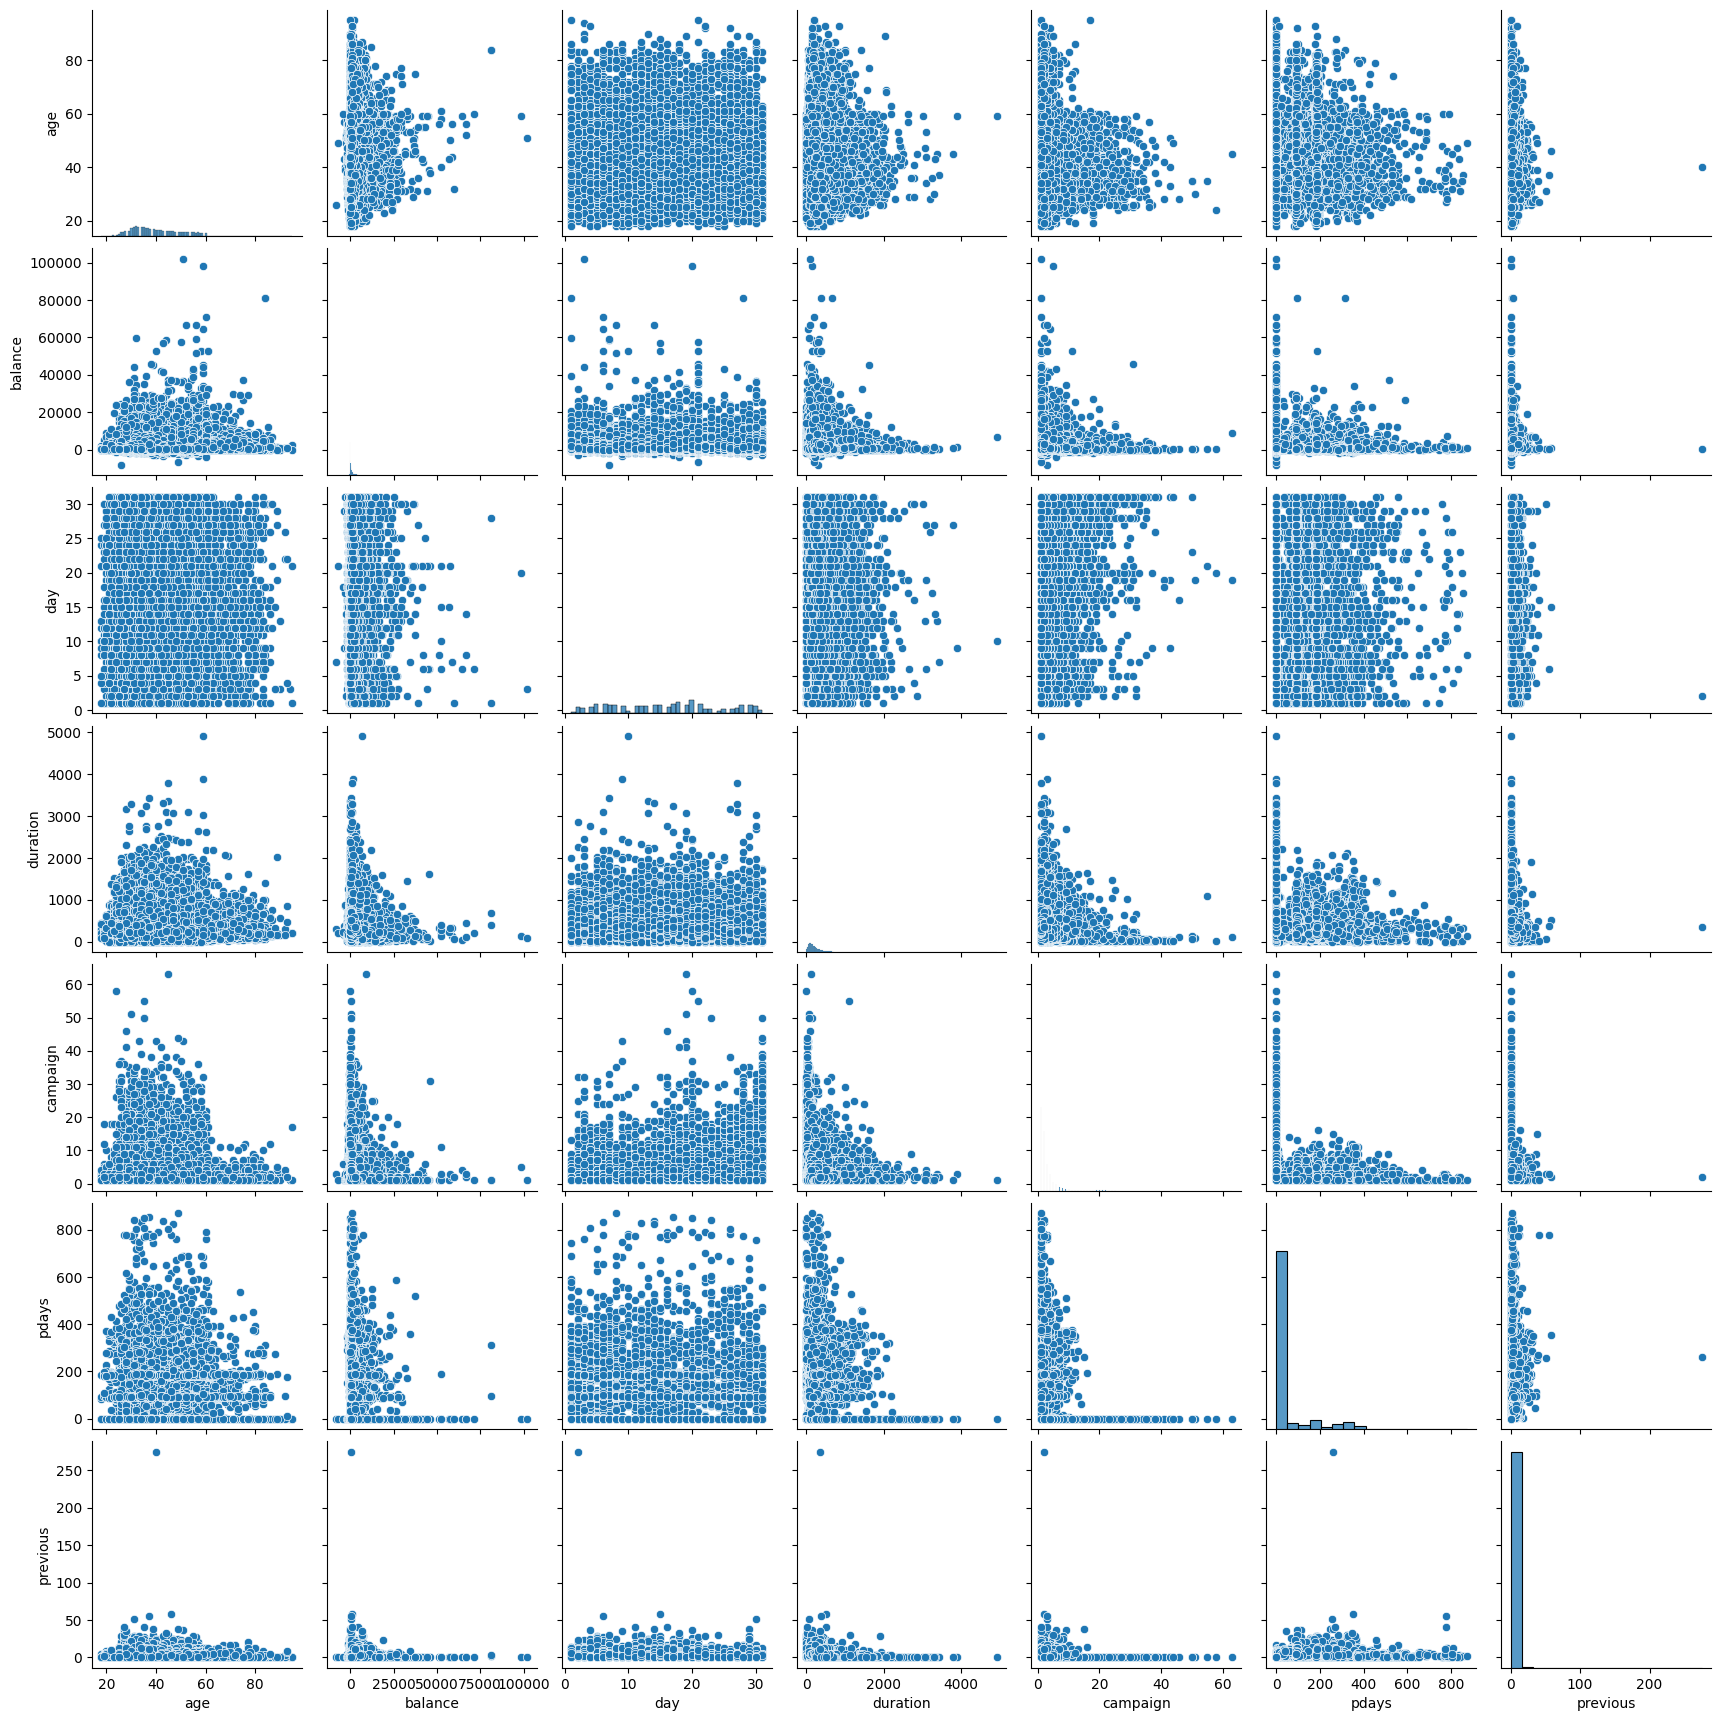

In [102]:
sns.pairplot(data,)

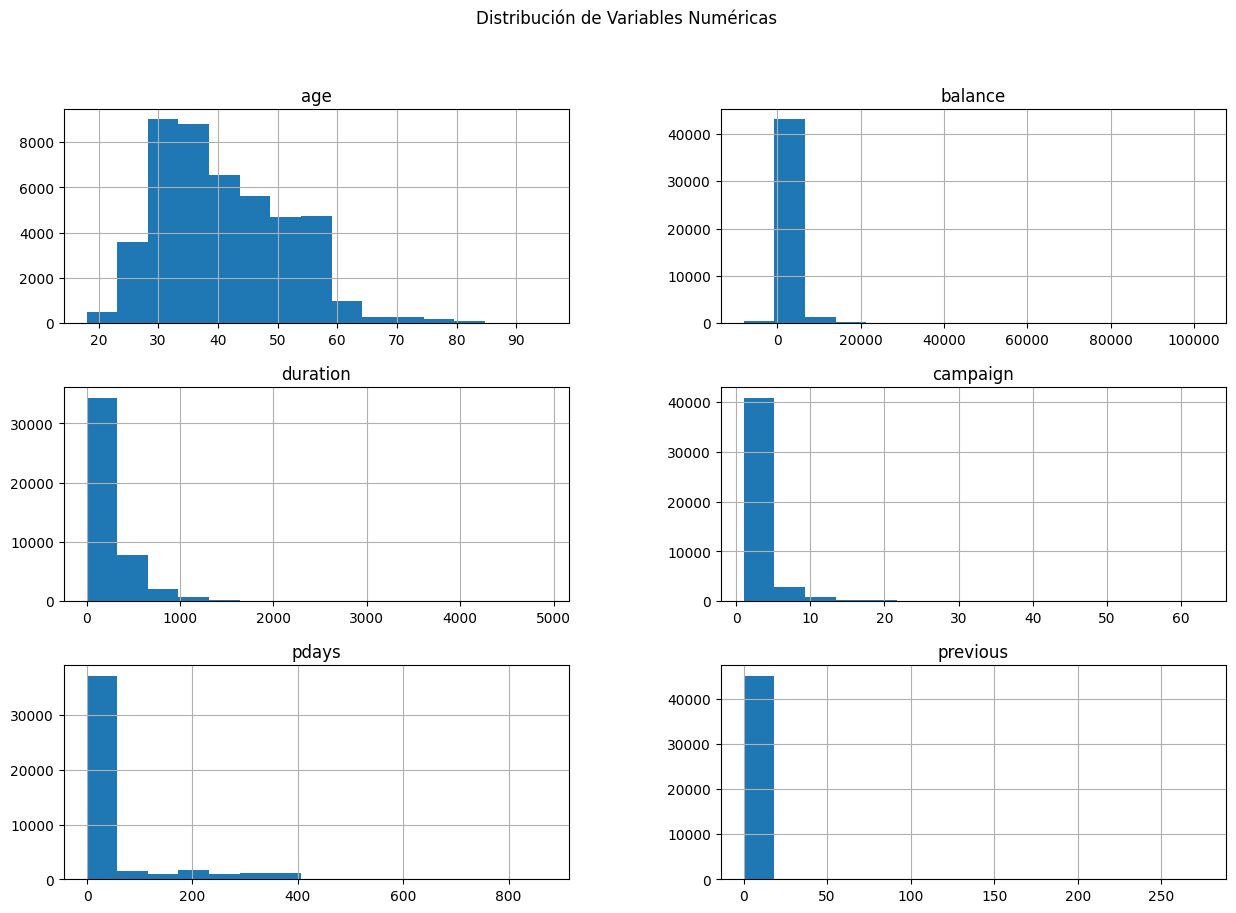

In [103]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
data[num_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

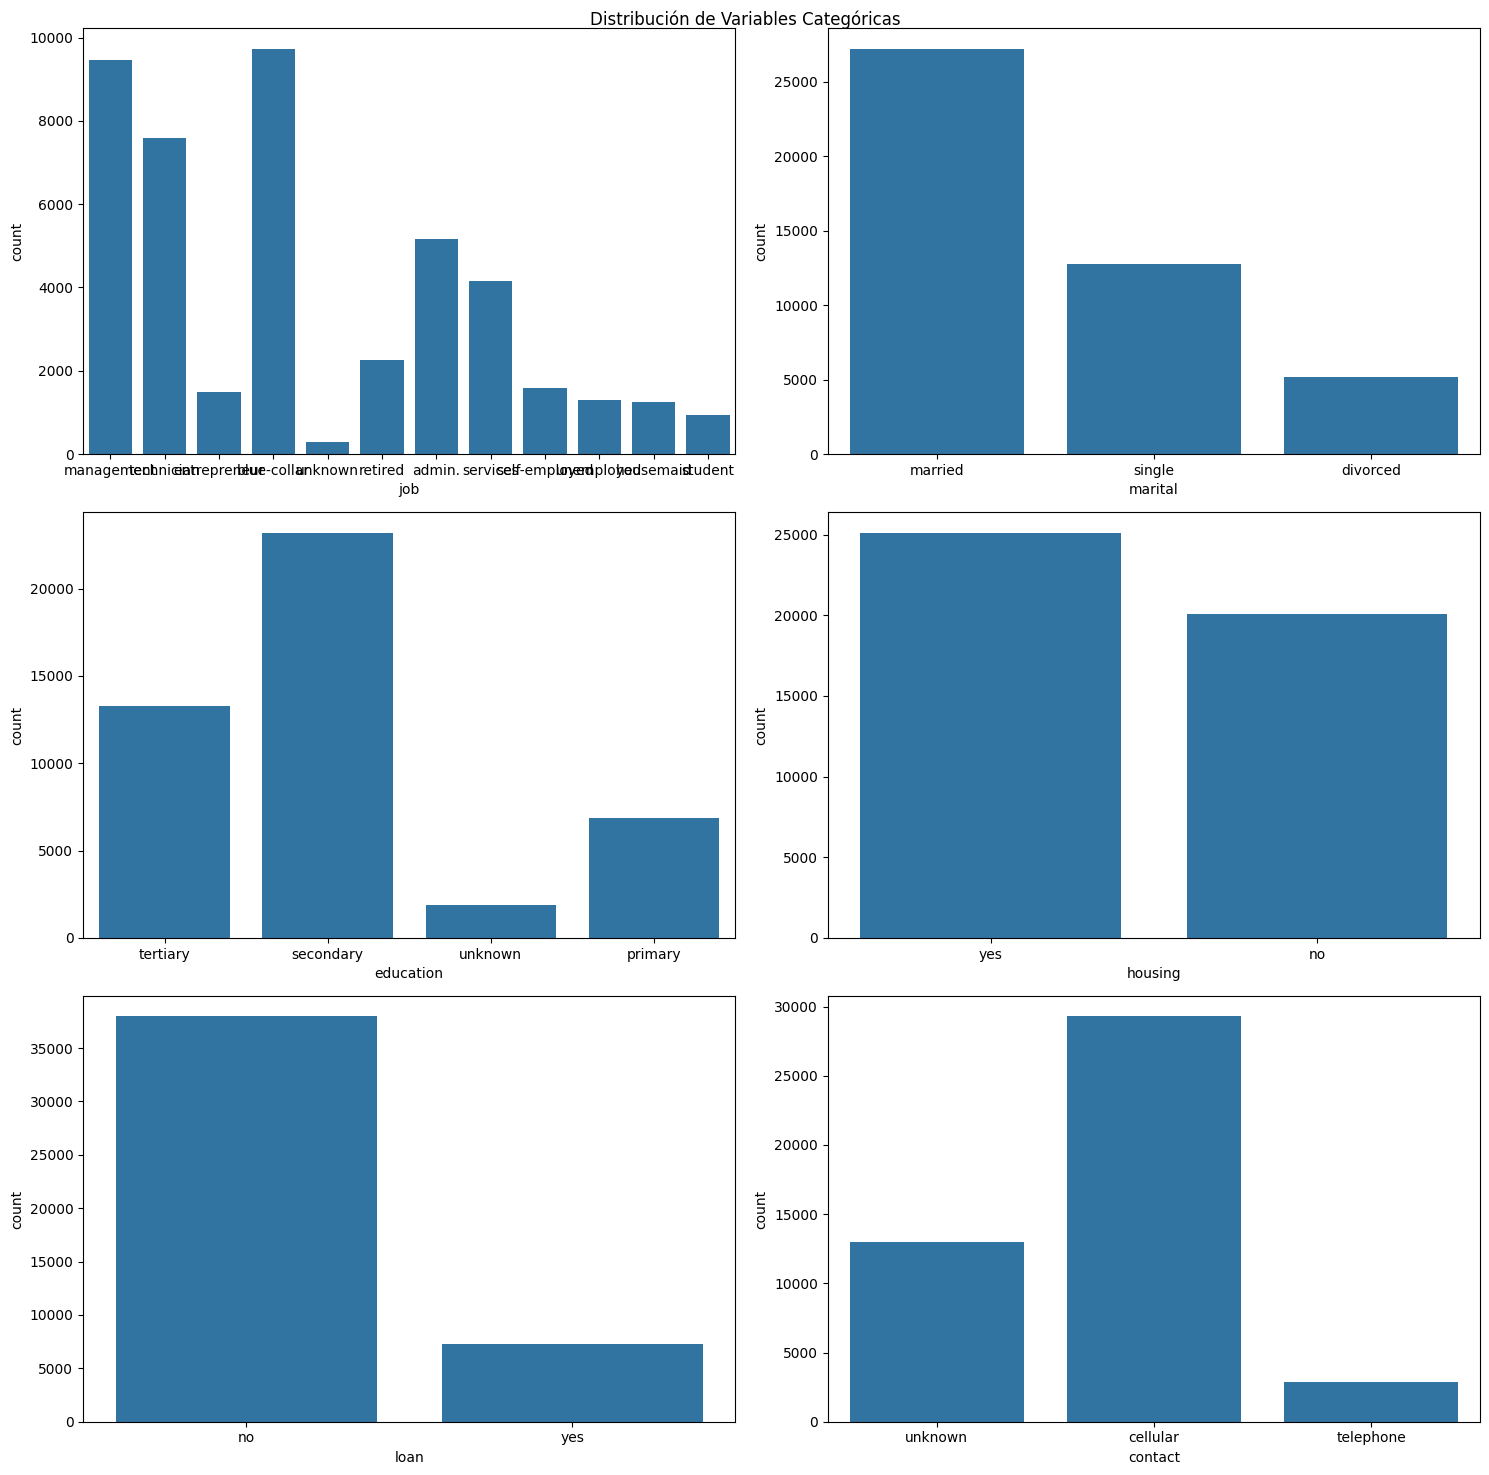

In [104]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.countplot(data=data, x='job', ax=axes[0, 0])
sns.countplot(data=data, x='marital', ax=axes[0, 1])
sns.countplot(data=data, x='education', ax=axes[1, 0])
sns.countplot(data=data, x='housing', ax=axes[1, 1])
sns.countplot(data=data, x='loan', ax=axes[2, 0])
sns.countplot(data=data, x='contact', ax=axes[2, 1])
fig.suptitle('Distribución de Variables Categóricas')
plt.tight_layout()
plt.show()

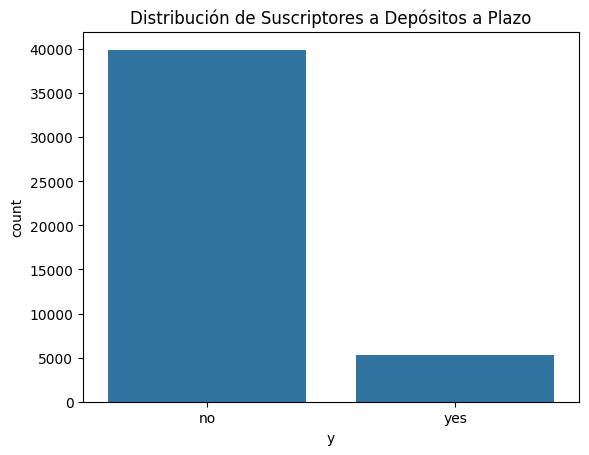

In [105]:
sns.countplot(data=data, x='y')
plt.title('Distribución de Suscriptores a Depósitos a Plazo')
plt.show()

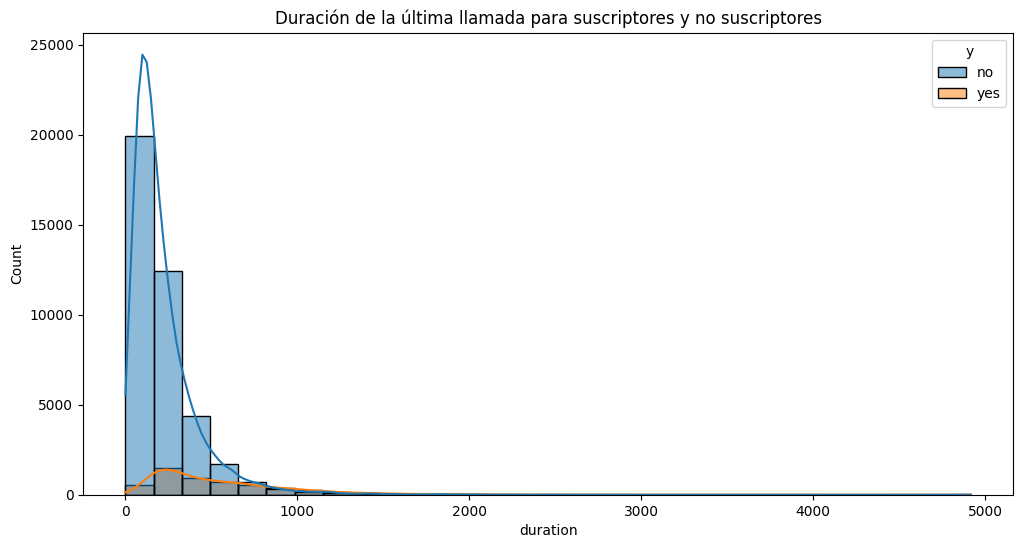

In [106]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='duration', hue=target, kde=True, bins=30)
plt.title('Duración de la última llamada para suscriptores y no suscriptores')
plt.show()

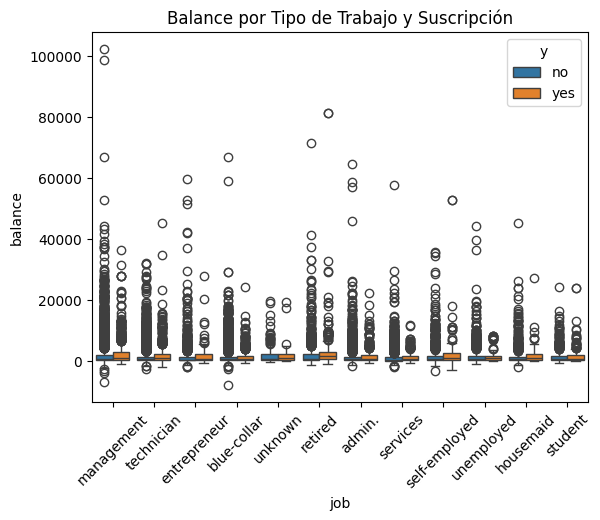

In [107]:
sns.boxplot(data=data, x='job', y='balance', hue=target)
plt.xticks(rotation=45)
plt.title('Balance por Tipo de Trabajo y Suscripción')
plt.show()

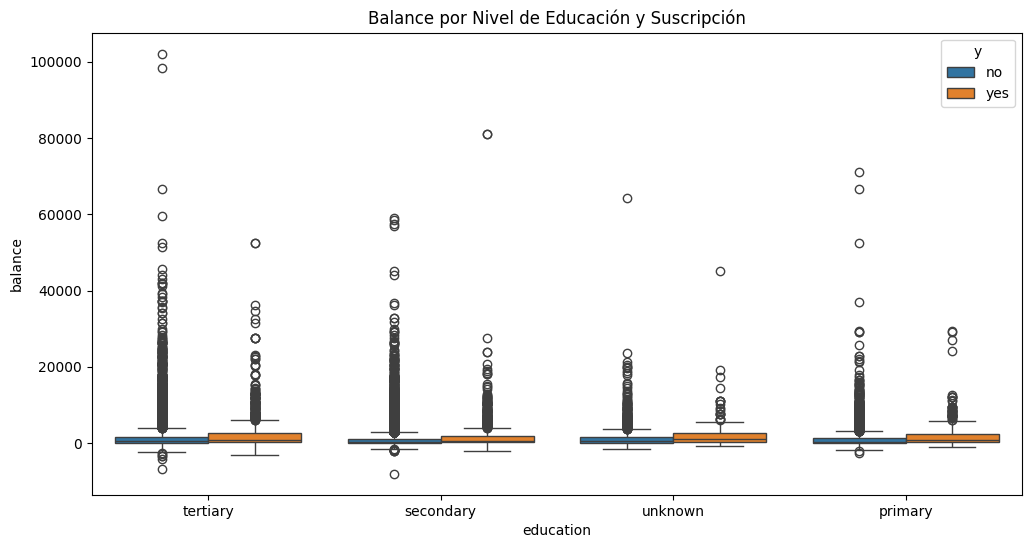

In [108]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='education', y='balance', hue=target)
plt.title('Balance por Nivel de Educación y Suscripción')
plt.show()

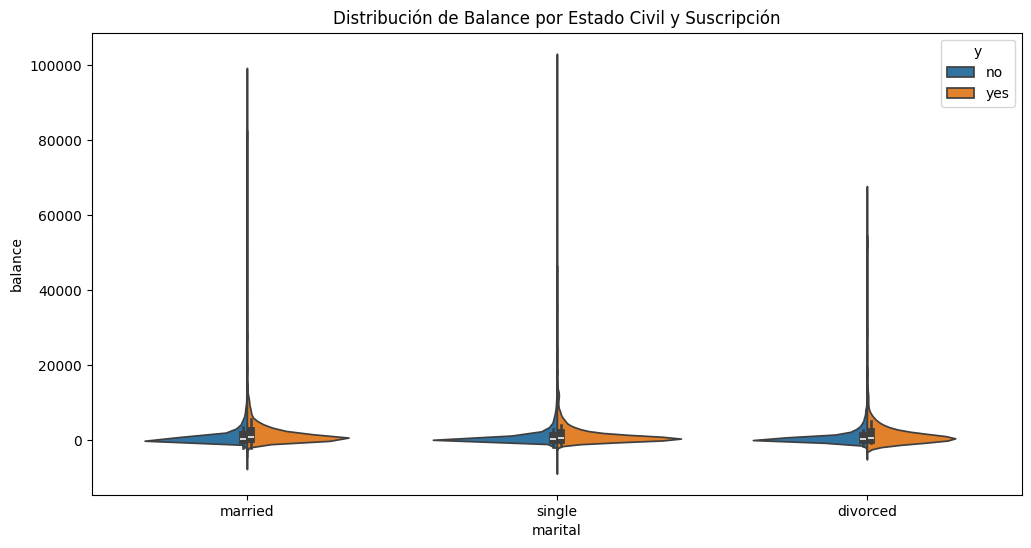

In [109]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='marital', y='balance', hue=target, split=True)
plt.title('Distribución de Balance por Estado Civil y Suscripción')
plt.show()

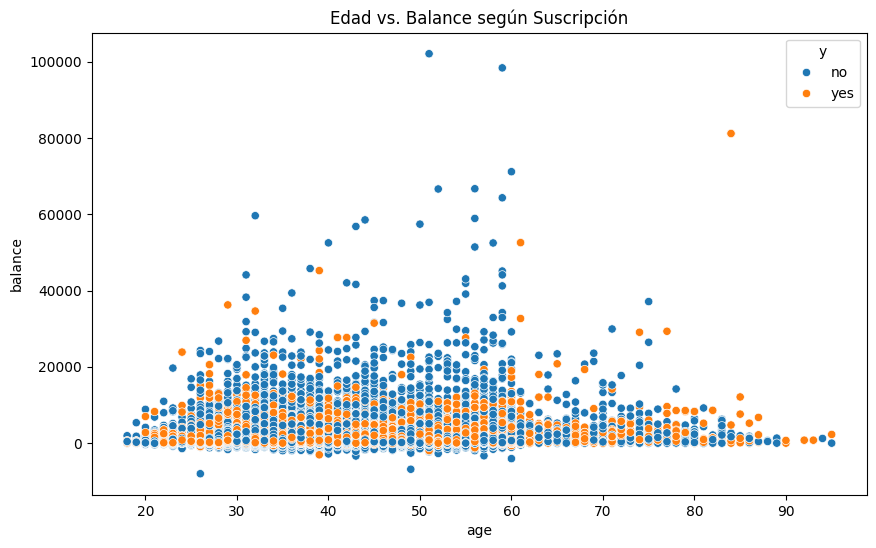

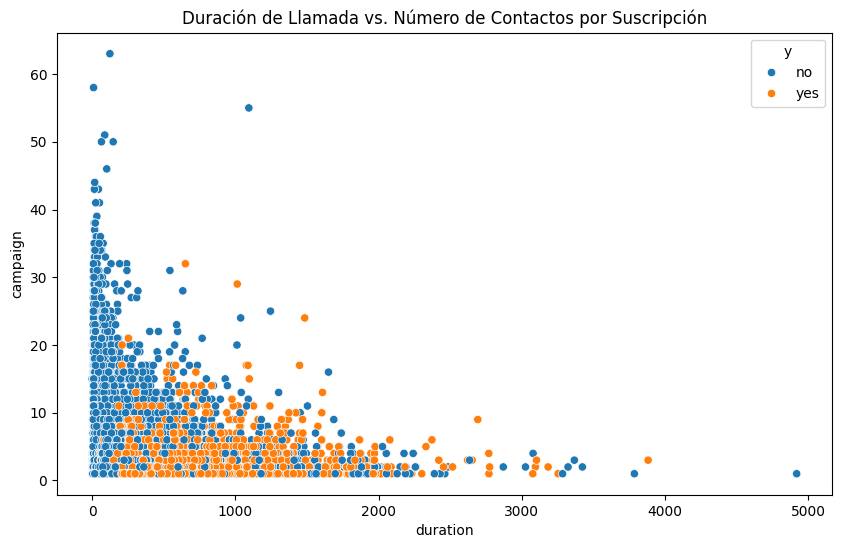

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='balance', hue=target)
plt.title('Edad vs. Balance según Suscripción')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='duration', y='campaign', hue='y')
plt.title('Duración de Llamada vs. Número de Contactos por Suscripción')
plt.show()

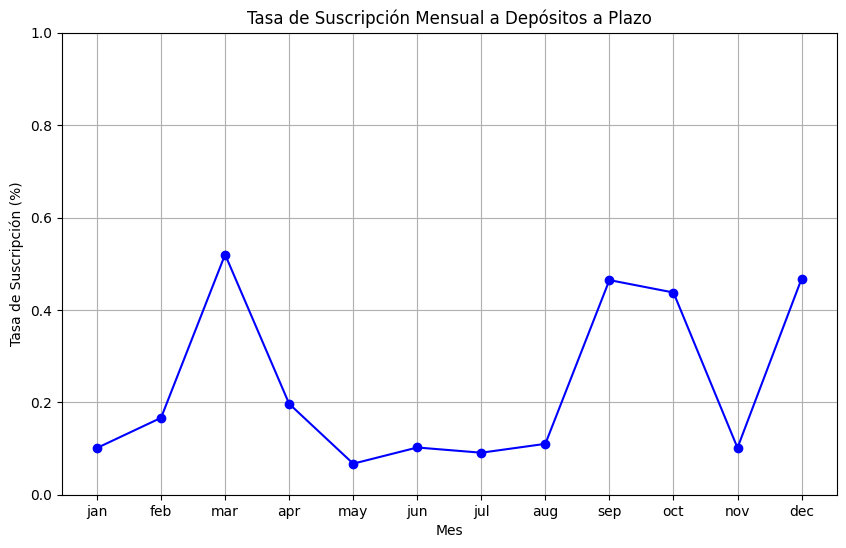

In [111]:
data['y_binary'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

monthly_subscription_rate = data.groupby('month')['y_binary'].mean().reindex(
    ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
)

# Graficar la tasa de suscripción mensual
plt.figure(figsize=(10, 6))
plt.plot(monthly_subscription_rate.index, monthly_subscription_rate.values, marker='o', color='b', linestyle='-')
plt.title('Tasa de Suscripción Mensual a Depósitos a Plazo')
plt.xlabel('Mes')
plt.ylabel('Tasa de Suscripción (%)')
plt.ylim(0, 1)  
plt.grid(True)
plt.show()

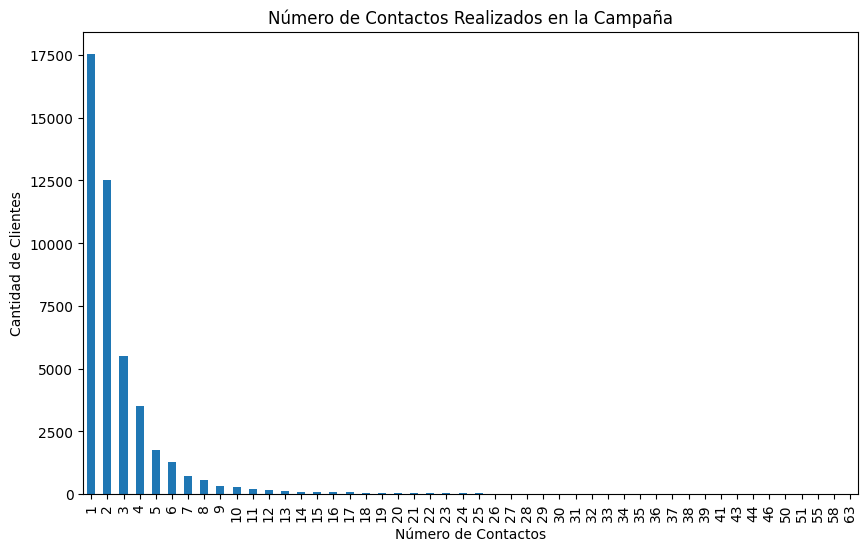

In [112]:
plt.figure(figsize=(10, 6))
data['campaign'].value_counts().sort_index().plot(kind='bar')
plt.title('Número de Contactos Realizados en la Campaña')
plt.xlabel('Número de Contactos')
plt.ylabel('Cantidad de Clientes')
plt.show()

C:\Users\vivia\AppData\Local\Temp\ipykernel_13436\3609850803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target, y='pdays', palette='muted')


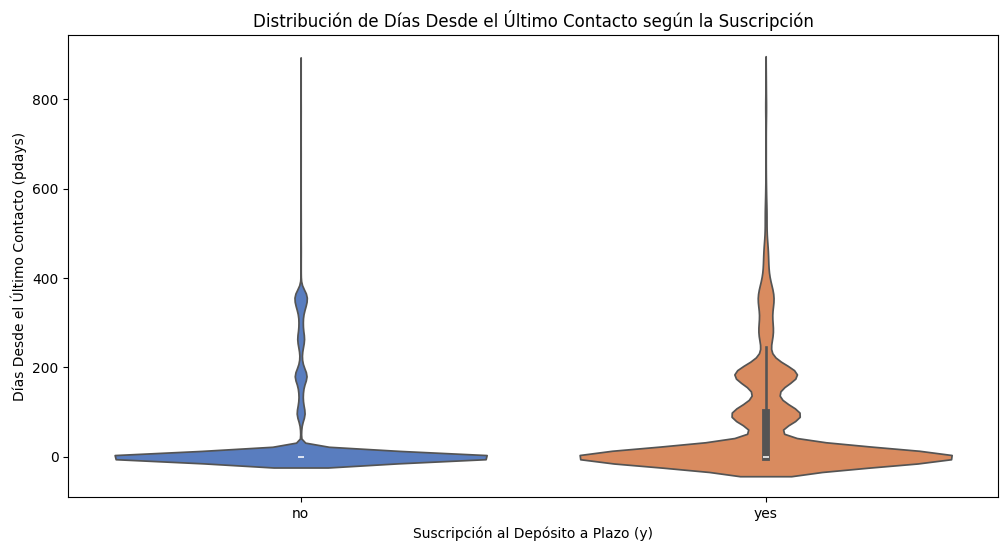

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x=target, y='pdays', palette='muted')
plt.title('Distribución de Días Desde el Último Contacto según la Suscripción')
plt.xlabel('Suscripción al Depósito a Plazo (y)')
plt.ylabel('Días Desde el Último Contacto (pdays)')
plt.show()

C:\Users\vivia\AppData\Local\Temp\ipykernel_13436\4031099104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target,y='poutcome', palette='muted')


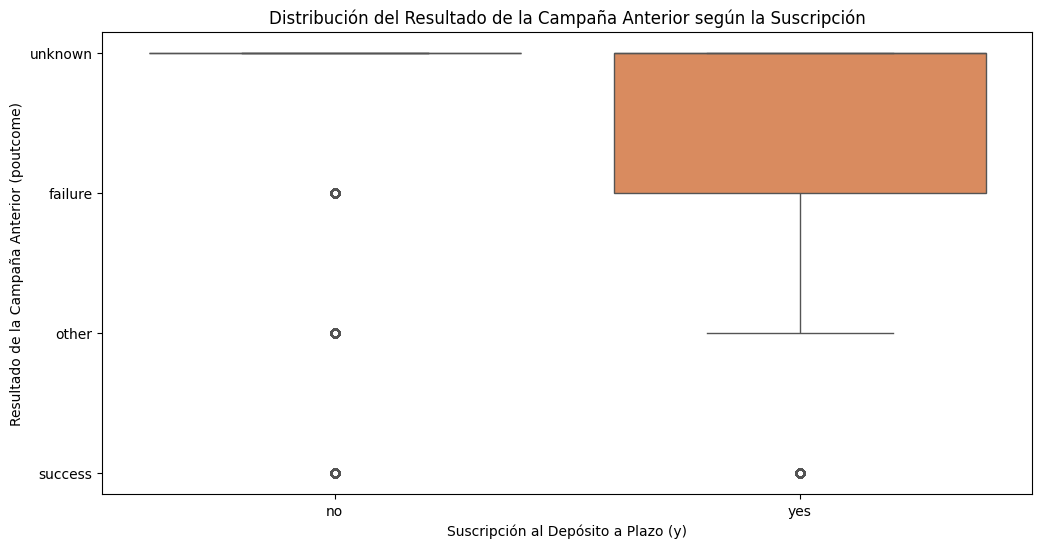

In [120]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x=target,y='poutcome', palette='muted')
plt.title('Distribución del Resultado de la Campaña Anterior según la Suscripción')
plt.xlabel('Suscripción al Depósito a Plazo (y)')
plt.ylabel('Resultado de la Campaña Anterior (poutcome)')
plt.show()